In [1]:
import pandas as pd
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import csv
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from PIL import Image

In [2]:
api_key = "#"
api_secret_key = "#"
access_token = "#"
access_token_secret_key = "#"

In [3]:
from pickle import TRUE


auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token,access_token_secret_key)

api = tweepy.API(auth, wait_on_rate_limit= TRUE)

In [4]:
username = api.user_timeline(id ="wtf1official", count = 200)
keywords =  api.search_tweets(q="leclerc", count = 1000, lang ="en")

Unexpected parameter: id


In [5]:
for tweet in username :
  print(tweet.text, tweet.user.screen_name)

A man of his word 😂 Fair play @Williams_F1_USA 👏 https://t.co/CUaj3mPaTT wtf1official
New design in the WTF1 Shop 🏆🦁🏆

https://t.co/FVbGgxH7ht https://t.co/RVQqt83cCF wtf1official
Our longest #WTF1Podcast ever 😂

#JapaneseGP race review

🎥 https://t.co/hz8QyopKVD https://t.co/dzrqgeeaaJ wtf1official
New #WTF1Podcast

Reaction to Red Bull's cost cap breach 👀

🍎 https://t.co/LtEvsMgz93
🟢 https://t.co/DyrBXBgbRK https://t.co/RVA0BbmOp9 wtf1official
NEW video 👀

Red Bull BROKE the 2021 cost cap regulations... What next?

🎥 https://t.co/lvTnfb6W1o https://t.co/LlS8xLfMb1 wtf1official
Red Bull have a released a statement after the FIA announcement 👀 https://t.co/TH3OGcbhpd wtf1official
The FIA have announced their findings 👇 https://t.co/hbYlBvL0VX wtf1official
We're live on Twitch talking about the recent cost cap news! 

https://t.co/CPCHNtXzVf wtf1official
🚨 Cost cap news 🚨

Procedural breach for Aston Martin

Procedural and minor overspend breach for Red Bull

We'll ha… https://t.co/LV28

In [6]:
for tweet in keywords :
  print('from ', tweet.user.screen_name, 'tweets: ', tweet.text, 'tweet date',tweet.created_at)

from,  snowflake_luke tweets:  RT @leclercgasIy: charles leclerc, pierre gasly, lewis hamilton : the big three  https://t.co/p8mjdzoDeF tweet date 2022-10-13 17:14:31+00:00
from,  Ziyech_Leclerc tweets:  @ArvidPahlman @EuropaLeague we can give it to you, it completes the Van Dijk tweet date 2022-10-13 17:14:17+00:00
from,  maxterclass tweets:  RT @formulastu: Actually annoys me that the full points rule wasn’t made public knowledge via the commentators on Sunday. Imagine how much… tweet date 2022-10-13 17:12:00+00:00
from,  Skycreaturetoo tweets:  @starscream1978 @chillen585 @leclerc_lord @YankeesNerds In 1980 a super computer that cost $100,000 was not as powe… https://t.co/HBGhgSYvWi tweet date 2022-10-13 17:12:00+00:00
from,  Skycreaturetoo tweets:  @starscream1978 @chillen585 @leclerc_lord @YankeesNerds Cooperation with government is not Socialism. tweet date 2022-10-13 17:11:52+00:00
from,  NBalasanian tweets:  RT @Malyanerika23: Hosting April 30 race in Baku is like handing a bla

In [7]:
df = pd.DataFrame([tweet.text for tweet in keywords], columns=['Tweets'])
user = [tweet.user.screen_name for tweet in keywords]
tweet_time = [tweet.created_at for tweet in keywords]
loc = [tweet.user.location for tweet in keywords]
df['username'] = user
df['tweet time'] = tweet_time
df['location'] = loc
df

,Tweets,username,tweet time,location
0,"RT @leclercgasIy: charles leclerc, pierre gasl...",snowflake_luke,2022-10-13 17:14:31+00:00,"Sydney, New South Wales"
1,@ArvidPahlman @EuropaLeague we can give it to ...,Ziyech_Leclerc,2022-10-13 17:14:17+00:00,
2,RT @formulastu: Actually annoys me that the fu...,maxterclass,2022-10-13 17:12:00+00:00,she/her | made in the 90's
3,@starscream1978 @chillen585 @leclerc_lord @Yan...,Skycreaturetoo,2022-10-13 17:12:00+00:00,
4,@starscream1978 @chillen585 @leclerc_lord @Yan...,Skycreaturetoo,2022-10-13 17:11:52+00:00,
...,...,...,...,...
95,"RT @CyberSlots: 🎁 4 x 50€ GIVEAWAY 🎁\n(Crypto,...",footyball420,2022-10-13 16:18:22+00:00,
96,RT @very_berry99: If liking Instagram posts me...,hawkeene16,2022-10-13 16:17:05+00:00,@slythamilton
97,@theAndiL @SamRamani2 @EmmanuelMacron @franced...,TheSayanFella,2022-10-13 16:16:41+00:00,"Langley beach, Taiwan"
98,RT @F1Visionary: When the Red Bull was chewing...,thakurijul,2022-10-13 16:16:24+00:00,


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Tweets      100 non-null    object             
 1   username    100 non-null    object             
 2   tweet time  100 non-null    datetime64[ns, UTC]
 3   location    100 non-null    object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 3.2+ KB


In [9]:
df.isnull()

,Tweets,username,tweet time,location
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


In [10]:
df.drop_duplicates(inplace= True)
df

,Tweets,username,tweet time,location
0,"RT @leclercgasIy: charles leclerc, pierre gasl...",snowflake_luke,2022-10-13 17:14:31+00:00,"Sydney, New South Wales"
1,@ArvidPahlman @EuropaLeague we can give it to ...,Ziyech_Leclerc,2022-10-13 17:14:17+00:00,
2,RT @formulastu: Actually annoys me that the fu...,maxterclass,2022-10-13 17:12:00+00:00,she/her | made in the 90's
3,@starscream1978 @chillen585 @leclerc_lord @Yan...,Skycreaturetoo,2022-10-13 17:12:00+00:00,
4,@starscream1978 @chillen585 @leclerc_lord @Yan...,Skycreaturetoo,2022-10-13 17:11:52+00:00,
...,...,...,...,...
95,"RT @CyberSlots: 🎁 4 x 50€ GIVEAWAY 🎁\n(Crypto,...",footyball420,2022-10-13 16:18:22+00:00,
96,RT @very_berry99: If liking Instagram posts me...,hawkeene16,2022-10-13 16:17:05+00:00,@slythamilton
97,@theAndiL @SamRamani2 @EmmanuelMacron @franced...,TheSayanFella,2022-10-13 16:16:41+00:00,"Langley beach, Taiwan"
98,RT @F1Visionary: When the Red Bull was chewing...,thakurijul,2022-10-13 16:16:24+00:00,


In [11]:
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', ' ', text) 
 text = re.sub('#', ' ', text) 
 text = re.sub('RT[\s]+', ' ', text) 
 text = re.sub('https?:\/\/\S+', ' ', text) 
 
 return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets,username,tweet time,location
0,": charles leclerc, pierre gasly, lewis hamilt...",snowflake_luke,2022-10-13 17:14:31+00:00,"Sydney, New South Wales"
1,"we can give it to you, it completes the Va...",Ziyech_Leclerc,2022-10-13 17:14:17+00:00,
2,: Actually annoys me that the full points rul...,maxterclass,2022-10-13 17:12:00+00:00,she/her | made in the 90's
3,1978 585 _lord In 1980 a super computer t...,Skycreaturetoo,2022-10-13 17:12:00+00:00,
4,1978 585 _lord Cooperation with governmen...,Skycreaturetoo,2022-10-13 17:11:52+00:00,
...,...,...,...,...
95,": 🎁 4 x 50€ GIVEAWAY 🎁\n(Crypto, Amazon, PayP...",footyball420,2022-10-13 16:18:22+00:00,
96,_berry99: If liking Instagram posts means you...,hawkeene16,2022-10-13 16:17:05+00:00,@slythamilton
97,2 _EN Because Rafales and F35 are direct...,TheSayanFella,2022-10-13 16:16:41+00:00,"Langley beach, Taiwan"
98,1Visionary: When the Red Bull was chewing up ...,thakurijul,2022-10-13 16:16:24+00:00,


In [12]:

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)


df

,Tweets,username,tweet time,location,Subjectivity,Polarity
0,": charles leclerc, pierre gasly, lewis hamilt...",snowflake_luke,2022-10-13 17:14:31+00:00,"Sydney, New South Wales",0.100000,0.000000
1,"we can give it to you, it completes the Va...",Ziyech_Leclerc,2022-10-13 17:14:17+00:00,,0.000000,0.000000
2,: Actually annoys me that the full points rul...,maxterclass,2022-10-13 17:12:00+00:00,she/her | made in the 90's,0.238889,0.116667
3,1978 585 _lord In 1980 a super computer t...,Skycreaturetoo,2022-10-13 17:12:00+00:00,,0.666667,0.333333
4,1978 585 _lord Cooperation with governmen...,Skycreaturetoo,2022-10-13 17:11:52+00:00,,0.000000,0.000000
...,...,...,...,...,...,...
95,": 🎁 4 x 50€ GIVEAWAY 🎁\n(Crypto, Amazon, PayP...",footyball420,2022-10-13 16:18:22+00:00,,0.000000,0.000000
96,_berry99: If liking Instagram posts means you...,hawkeene16,2022-10-13 16:17:05+00:00,@slythamilton,0.687500,-0.312500
97,2 _EN Because Rafales and F35 are direct...,TheSayanFella,2022-10-13 16:16:41+00:00,"Langley beach, Taiwan",0.400000,0.100000
98,1Visionary: When the Red Bull was chewing up ...,thakurijul,2022-10-13 16:16:24+00:00,,0.000000,0.000000


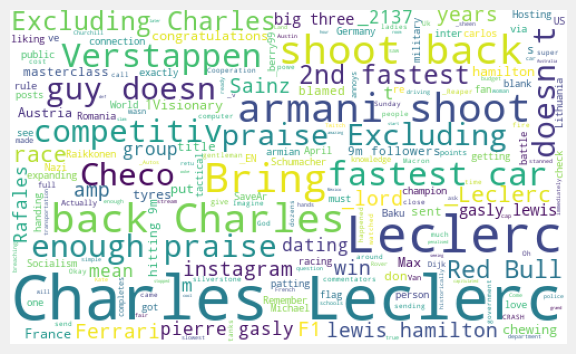

<Figure size 640x480 with 0 Axes>

In [13]:
from turtle import color


words = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110, background_color='white').generate(words)

plt.imshow(wordCloud)
plt.axis('off')
img = plt.gcf()
plt.show()
plt.draw()
img.savefig('test.png')

In [14]:
plt.savefig('WC.jpg', dpi=300, bbox_inches='tight')
img= Image.open("WC.jpg") 

<Figure size 640x480 with 0 Axes>

In [15]:
plt.show(img)

In [16]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

In [17]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,username,tweet time,location,Subjectivity,Polarity,Analysis
0,": charles leclerc, pierre gasly, lewis hamilt...",snowflake_luke,2022-10-13 17:14:31+00:00,"Sydney, New South Wales",0.100000,0.000000,Neutral
1,"we can give it to you, it completes the Va...",Ziyech_Leclerc,2022-10-13 17:14:17+00:00,,0.000000,0.000000,Neutral
2,: Actually annoys me that the full points rul...,maxterclass,2022-10-13 17:12:00+00:00,she/her | made in the 90's,0.238889,0.116667,Positive
3,1978 585 _lord In 1980 a super computer t...,Skycreaturetoo,2022-10-13 17:12:00+00:00,,0.666667,0.333333,Positive
4,1978 585 _lord Cooperation with governmen...,Skycreaturetoo,2022-10-13 17:11:52+00:00,,0.000000,0.000000,Neutral
...,...,...,...,...,...,...,...
95,": 🎁 4 x 50€ GIVEAWAY 🎁\n(Crypto, Amazon, PayP...",footyball420,2022-10-13 16:18:22+00:00,,0.000000,0.000000,Neutral
96,_berry99: If liking Instagram posts means you...,hawkeene16,2022-10-13 16:17:05+00:00,@slythamilton,0.687500,-0.312500,Negative
97,2 _EN Because Rafales and F35 are direct...,TheSayanFella,2022-10-13 16:16:41+00:00,"Langley beach, Taiwan",0.400000,0.100000,Positive
98,1Visionary: When the Red Bull was chewing up ...,thakurijul,2022-10-13 16:16:24+00:00,,0.000000,0.000000,Neutral


65 24 11


([<matplotlib.patches.Wedge at 0x221ee550820>,
 [Text(0.8018655028537539, 0.7530018030078657, 'Positive'),
  Text(-1.0095301356987352, -0.4368625700561832, 'Neutral'),
  Text(1.0349687767745064, -0.3726119041333521, 'Negative')],
 [Text(0.43738118337477483, 0.4107282561861085, '24%'),
  Text(-0.5506528012902191, -0.2382886745760999, '65%'),
  Text(0.5645284236951852, -0.20324285680001022, '11%')])

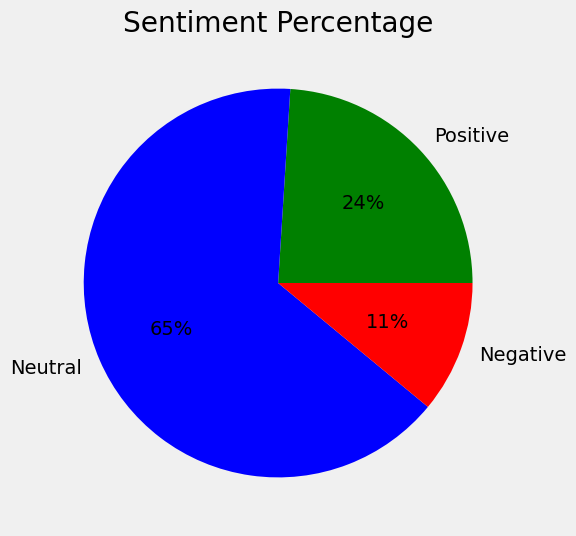

In [18]:
Neutral_count = df['Analysis'].value_counts().Neutral
Positive_count = df['Analysis'].value_counts().Positive
Negative_count = df['Analysis'].value_counts().Negative

print(Neutral_count,Positive_count,Negative_count)

bar_names = ['Positive','Neutral','Negative']
label = [Positive_count, Neutral_count,Negative_count]
color = ['green','blue','red']
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.set_title('Sentiment Percentage')
ax.pie(label,labels=bar_names,colors=color,autopct='%1.0f%%')
